In [38]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
def is_weekend(weekday):
    return weekday in [5,6]

### Feature forklaring
- User Type: 
    - Customer = 24-hour pass or 3-day pass
    - Subscriber = Annual Member
- Gender:
    - 0 -> Unknown
    - 1 -> Male
    - 2 -> Female

In [40]:
f=pd.read_csv(r"Trips_2018.csv")

In [41]:
f.describe()

,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


In [42]:
f = f.rename({"Unnamed: 0": "Trip ID"}, axis="columns")
f = f.set_index("Trip ID")

In [43]:
f.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
Trip ID,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [44]:
f['starttime'] = pd.to_datetime(f['starttime'], format='%Y-%m-%d %H:%M:%S.%f')
f['stoptime'] = pd.to_datetime(f['stoptime'], format='%Y-%m-%d %H:%M:%S.%f')
f['weekday']= f['starttime'].dt.weekday
f['is_weekend']=[is_weekend(el) for el in f['weekday']]
sm_dummies=pd.get_dummies(f, columns=['usertype'])
sm_dummies.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,weekday,is_weekend,usertype_Customer,usertype_Subscriber
Trip ID,,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,0,False,False,True
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,0,False,False,True
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,0,False,False,True
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,0,False,False,True
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,0,False,False,True


In [45]:
f.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
dtype: object

In [46]:
sm_dummies.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
gender                              int64
weekday                             int32
is_weekend                           bool
usertype_Customer                    bool
usertype_Subscriber                  bool
dtype: object

# Clustering

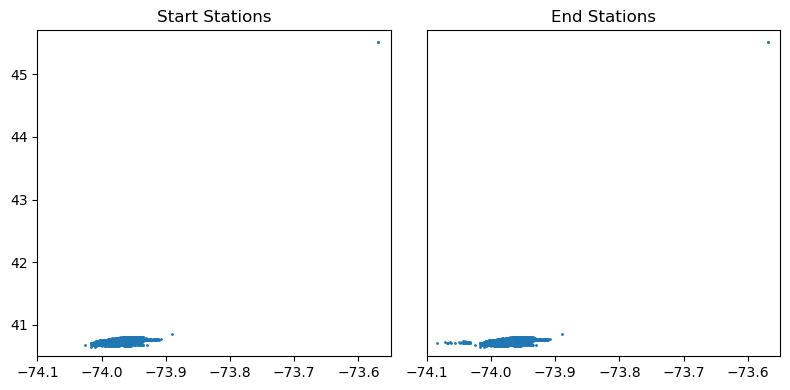

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

xlim, ylim = (-74.1, -73.55), (40.5, 45.7)
dot_size = 1

start_station_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
start_station_df = start_station_df.set_index("start_station_id")
start_station_df = start_station_df.rename(
    {
        "start_station_latitude": "latitude", 
        "start_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax1.scatter(start_station_df['longitude'],start_station_df['latitude'],s=dot_size)
ax1.set_title("Start Stations")
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)

end_station_df = f.drop_duplicates(subset='end_station_id')[['end_station_id', 'end_station_latitude', 'end_station_longitude']]
end_station_df = end_station_df.set_index("end_station_id")
end_station_df = end_station_df.rename(
    {
        "end_station_latitude": "latitude", 
        "end_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax2.scatter(end_station_df['longitude'],end_station_df['latitude'],s=dot_size)
ax2.set_title("End Stations")
ax2.set_xlim(*xlim)
ax2.set_ylim(*ylim)
ax2.set_yticks([])

plt.tight_layout()
plt.show()

# Remove outlier

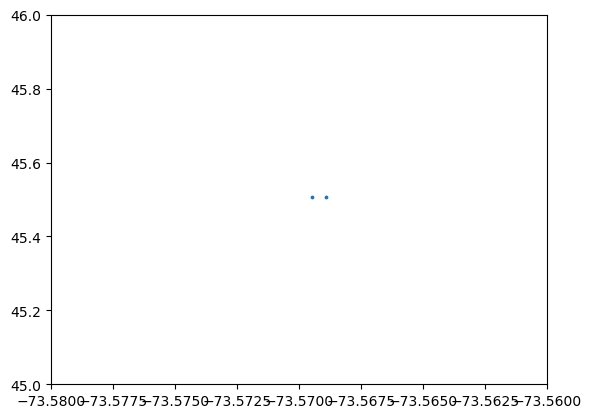

In [48]:
plt.scatter(start_station_df['longitude'], start_station_df['latitude'], s=3)
plt.xlim((-73.58, -73.56))
plt.ylim((45, 46))
plt.show()

In [49]:
start_station_df[start_station_df.longitude > -73.6]

,latitude,longitude
start_station_id,,
3488.0,45.506364,-73.569463
3650.0,45.506264,-73.568906


In [50]:
end_station_df[end_station_df.longitude > -73.6]

,latitude,longitude
end_station_id,,
3488.0,45.506364,-73.569463
3650.0,45.506264,-73.568906


In [51]:
f[
    (f.start_station_id == 3488.0) &
    (f.start_station_id != f.end_station_id)
]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
Trip ID,,,,,,,,,,,,,,,


In [52]:
f[
    (f.end_station_id == 3488.0) &
    (f.start_station_id != f.end_station_id)
]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
Trip ID,,,,,,,,,,,,,,,
8772457,1634200,2018-07-18 18:27:51.511,2018-08-06 16:24:32.388,3036.0,40.662908,-73.999722,3488.0,45.506364,-73.569463,24354,Subscriber,1988,1,2,False


In [53]:
f[
    (f.start_station_id == 3650.0) &
    (f.start_station_id != f.end_station_id)
]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
Trip ID,,,,,,,,,,,,,,,


In [54]:
f[
    (f.end_station_id == 3650.0) &
    (f.start_station_id != f.end_station_id)
]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
Trip ID,,,,,,,,,,,,,,,


In [55]:
f[
    (f.start_station_id == 3488) | (f.end_station_id == 3488) |
    (f.start_station_id == 3650) | (f.end_station_id == 3650)
].describe()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,weekday
count,8.200000e+01,82,82,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2.954804e+04,2018-03-14 21:46:53.854036736,2018-03-15 05:59:22.416878080,3636.585366,45.447203,-73.574180,3642.097561,45.506269,-73.568933,23651.158537,1985.792683,1.012195,1.378049
min,6.200000e+01,2018-01-08 16:03:59.375000,2018-01-08 16:09:41.338000,3036.000000,40.662908,-73.999722,3488.000000,45.506264,-73.569463,17667.000000,1969.000000,0.000000,0.000000
25%,2.235000e+02,2018-01-26 10:59:14.185999872,2018-01-26 12:46:01.522750208,3650.000000,45.506264,-73.568906,3650.000000,45.506264,-73.568906,21928.000000,1986.000000,1.000000,0.000000
50%,9.390000e+02,2018-02-20 14:11:07.361499904,2018-02-20 14:12:41.880000,3650.000000,45.506264,-73.568906,3650.000000,45.506264,-73.568906,24354.000000,1986.000000,1.000000,1.000000
75%,2.653500e+03,2018-05-08 17:10:19.270750208,2018-05-08 17:19:55.421250048,3650.000000,45.506264,-73.568906,3650.000000,45.506264,-73.568906,24354.000000,1986.000000,1.000000,3.000000
max,1.634200e+06,2018-07-18 18:27:51.511000,2018-08-06 16:24:32.388000,3650.000000,45.506364,-73.568906,3650.000000,45.506364,-73.568906,24354.000000,1988.000000,2.000000,4.000000
std,1.827257e+05,NaN,NaN,73.784128,0.534860,0.047574,35.110974,0.000022,0.000121,1256.116408,2.752049,0.248149,1.329998


We have two outliers stations with id 3448 and 3650. We found that they are both placed right next to one another in Montreal, Canada. From the above cells, it is apparent that all but one trips completed with start or end point in Montreal (station 3488 and 3650) are trips in Montreal only.

There is a single trip from Brooklyn (station 3036) to Montreal (station 3488). It's duration is 18.9 days and out of 17 million trips completed, this one is the only one travelling to Montreal. Therefore we classify stations in Montreal as not relevant and outliers.

In [56]:
f = f.drop(
    f[
        (f.start_station_id == 3488) | (f.end_station_id == 3488) |
        (f.start_station_id == 3650) | (f.end_station_id == 3650)
    ].index
)

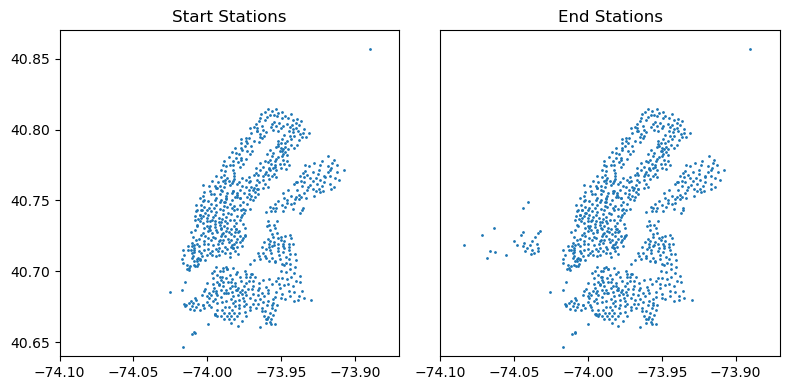

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

xlim, ylim = (-74.1, -73.87), (40.64, 40.87)
dot_size = 1

start_station_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
start_station_df = start_station_df.set_index("start_station_id")
start_station_df = start_station_df.rename(
    {
        "start_station_latitude": "latitude", 
        "start_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax1.scatter(start_station_df['longitude'],start_station_df['latitude'],s=dot_size)
ax1.set_title("Start Stations")
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)

end_station_df = f.drop_duplicates(subset='end_station_id')[['end_station_id', 'end_station_latitude', 'end_station_longitude']]
end_station_df = end_station_df.set_index("end_station_id")
end_station_df = end_station_df.rename(
    {
        "end_station_latitude": "latitude", 
        "end_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax2.scatter(end_station_df['longitude'],end_station_df['latitude'],s=dot_size)
ax2.set_title("End Stations")
ax2.set_xlim(*xlim)
ax2.set_ylim(*ylim)
ax2.set_yticks([])

plt.tight_layout()
plt.show()

### Classifying the stations with ID: NaN

We find that a great deal of stations have ID = NaN. So we try and plot them to find their location.

In [58]:
start_ids = np.unique(f.start_station_id)
end_ids = np.unique(f.end_station_id)
print(f"Number of NaN values in start_station_id: {f.start_station_id.isna().sum()}")
print(f"Number of NaN values in end_station_id: {f.end_station_id.isna().sum()}")
start_station_df[start_station_df.index.isna()]

Number of NaN values in start_station_id: 2497
Number of NaN values in end_station_id: 2497


,latitude,longitude
start_station_id,,
NaN,40.857,-73.89


2497 trips have a station ID with NaN-value

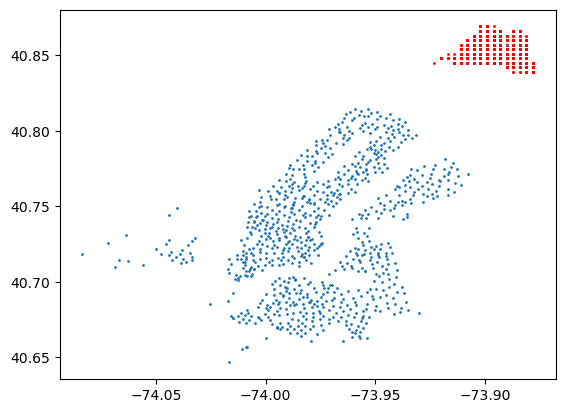

In [59]:
f_nan = f[f.start_station_id.isna()][['start_station_longitude', 'start_station_latitude']]
plt.scatter(f_nan.start_station_longitude, f_nan.start_station_latitude, s=1, c='r', label="NaN-station")
plt.scatter(end_station_df['longitude'], end_station_df['latitude'], s=1)
plt.show()

In [60]:
print("\nCheck: Are the placements different? If all 0, then all placements same")
print(np.unique(f[f.start_station_id.isna()].start_station_longitude) - np.unique(f[f.start_station_id.isna()].end_station_longitude))
print(np.unique(f[f.end_station_id.isna()].start_station_longitude) - np.unique(f[f.end_station_id.isna()].end_station_longitude))
print(np.unique(f[f.start_station_id.isna()].start_station_latitude) - np.unique(f[f.start_station_id.isna()].end_station_latitude))
print(np.unique(f[f.end_station_id.isna()].start_station_latitude) - np.unique(f[f.end_station_id.isna()].end_station_latitude))

print("\nValues for longitude and latitude")
print(np.unique(f[f.start_station_id.isna()].start_station_longitude))
print(np.unique(f[f.start_station_id.isna()].start_station_latitude))

print(f"\nNumber of stations with NaN-value as ID: {len(np.unique(f[f.start_station_id.isna()].start_station_longitude))}")


Check: Are the placements different? If all 0, then all placements same
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Values for longitude and latitude
[-73.923 -73.92  -73.917 -73.914 -73.911 -73.908 -73.905 -73.902 -73.899
 -73.896 -73.893 -73.89  -73.887 -73.884 -73.881 -73.878]
[40.839 40.842 40.845 40.848 40.851 40.854 40.857 40.86  40.863 40.866
 40.869]

Number of stations with NaN-value as ID: 16


Okay, all 16 NaN-ID-stations are located in a single 'cluster' or grouping.
Looking at the placement in a map, the red grouping lies in the Bronx area North of New York. Also as a result of our plotting the single blue dot is the result of dropping duplicates on the ID's. This means that it, in previous plots, represented all the red dots, we now found.

We check whether or not we have data on any trips leaving this grouping. 

In [61]:
f[(f.start_station_id.isna()) & (f.end_station_id.notna())]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
Trip ID,,,,,,,,,,,,,,,


In [62]:
f[(f.start_station_id.notna()) & (f.end_station_id.isna())]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend
Trip ID,,,,,,,,,,,,,,,


Okay, no trips from a NaN-ID-station leaves the grouping in the Bronx area. Hence, they have no implication on clusters in the central New York area. Since that is the case they wont be important for rebalancing the bike locations, so we classicy them as outliers

In [63]:
f = f.dropna()

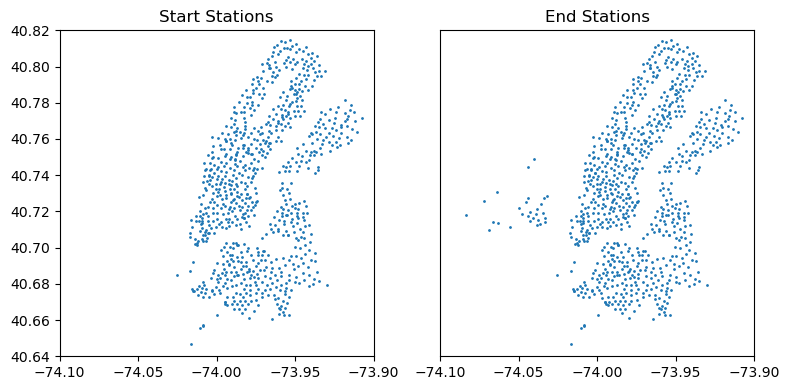

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

xlim, ylim = (-74.1, -73.9), (40.64, 40.82)
dot_size = 1

start_station_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
start_station_df = start_station_df.set_index("start_station_id")
start_station_df = start_station_df.rename(
    {
        "start_station_latitude": "latitude", 
        "start_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax1.scatter(start_station_df['longitude'],start_station_df['latitude'],s=dot_size)
ax1.set_title("Start Stations")
ax1.set_xlim(*xlim)
ax1.set_ylim(*ylim)

end_station_df = f.drop_duplicates(subset='end_station_id')[['end_station_id', 'end_station_latitude', 'end_station_longitude']]
end_station_df = end_station_df.set_index("end_station_id")
end_station_df = end_station_df.rename(
    {
        "end_station_latitude": "latitude", 
        "end_station_longitude": "longitude"
    }, 
    axis="columns"
)
ax2.scatter(end_station_df['longitude'],end_station_df['latitude'],s=dot_size)
ax2.set_title("End Stations")
ax2.set_xlim(*xlim)
ax2.set_ylim(*ylim)
ax2.set_yticks([])

plt.tight_layout()
plt.show()

In [66]:

print("\nStart ID's not in End ID's")
for ID in start_ids:
    if not np.isnan(ID) and ID not in end_ids:
        print(ID)

print("\nEnd ID's not in Start ID's")
k = 0
for ID in end_ids:
    if not np.isnan(ID) and ID not in start_ids:
        print(ID)
        k += 1
print(f'{k} number of stations are END but not START')


Start ID's not in End ID's

End ID's not in Start ID's
3183.0
3184.0
3185.0
3186.0
3187.0
3191.0
3192.0
3195.0
3196.0
3198.0
3199.0
3202.0
3203.0
3213.0
3214.0
3267.0
3268.0
3270.0
3275.0
3276.0
3277.0
3279.0
3426.0
3428.0
3481.0
3638.0
3639.0
3645.0
3651.0
3652.0
3678.0
3681.0
32 number of stations are END but not START


## DBScan

In [21]:
from sklearn.cluster import DBSCAN
dbs_start_station=DBSCAN(min_samples=5, eps=0.004) 
dbs_end_station=DBSCAN(min_samples=5, eps=0.004)
dbs_start_station.fit(start_station_df)
dbs_end_station.fit(end_station_df)

,eps,0.004
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [22]:
np.unique(dbs_start_station.labels_), np.unique(dbs_end_station.labels_)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17]),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18]))

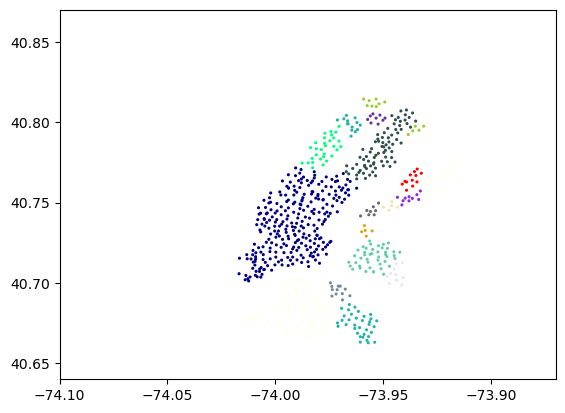

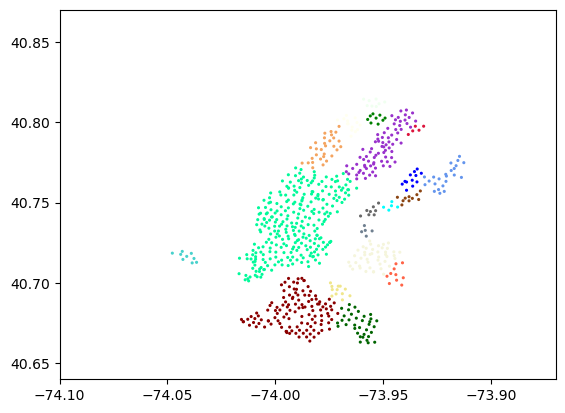

In [23]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(dbs_start_station.labels_))-1   #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors=random.choices(colors, k=num_colors)
x_=[]
y_=[]
c_=[]
for label, x_val, y_val in zip(dbs_start_station.labels_, start_station_df['longitude'], start_station_df['latitude']):
    if label==-1:
        continue
    x_.append(x_val)
    y_.append(y_val)
    c_.append(cluster_colors[label])
#plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=1.5,c=c_)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

num_colors_end=len(set(dbs_end_station.labels_))-1
cluster_colors_end=random.choices(colors, k=num_colors_end)
x_end=[]
y_end=[]
c_end=[]
for label, x_val, y_val in zip(dbs_end_station.labels_, end_station_df['longitude'], end_station_df['latitude']):
    if label==-1:
        continue
    x_end.append(x_val)
    y_end.append(y_val)
    c_end.append(cluster_colors_end[label])
plt.scatter(x_end,y_end,s=1.5,c=c_end)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.show()

## K-means

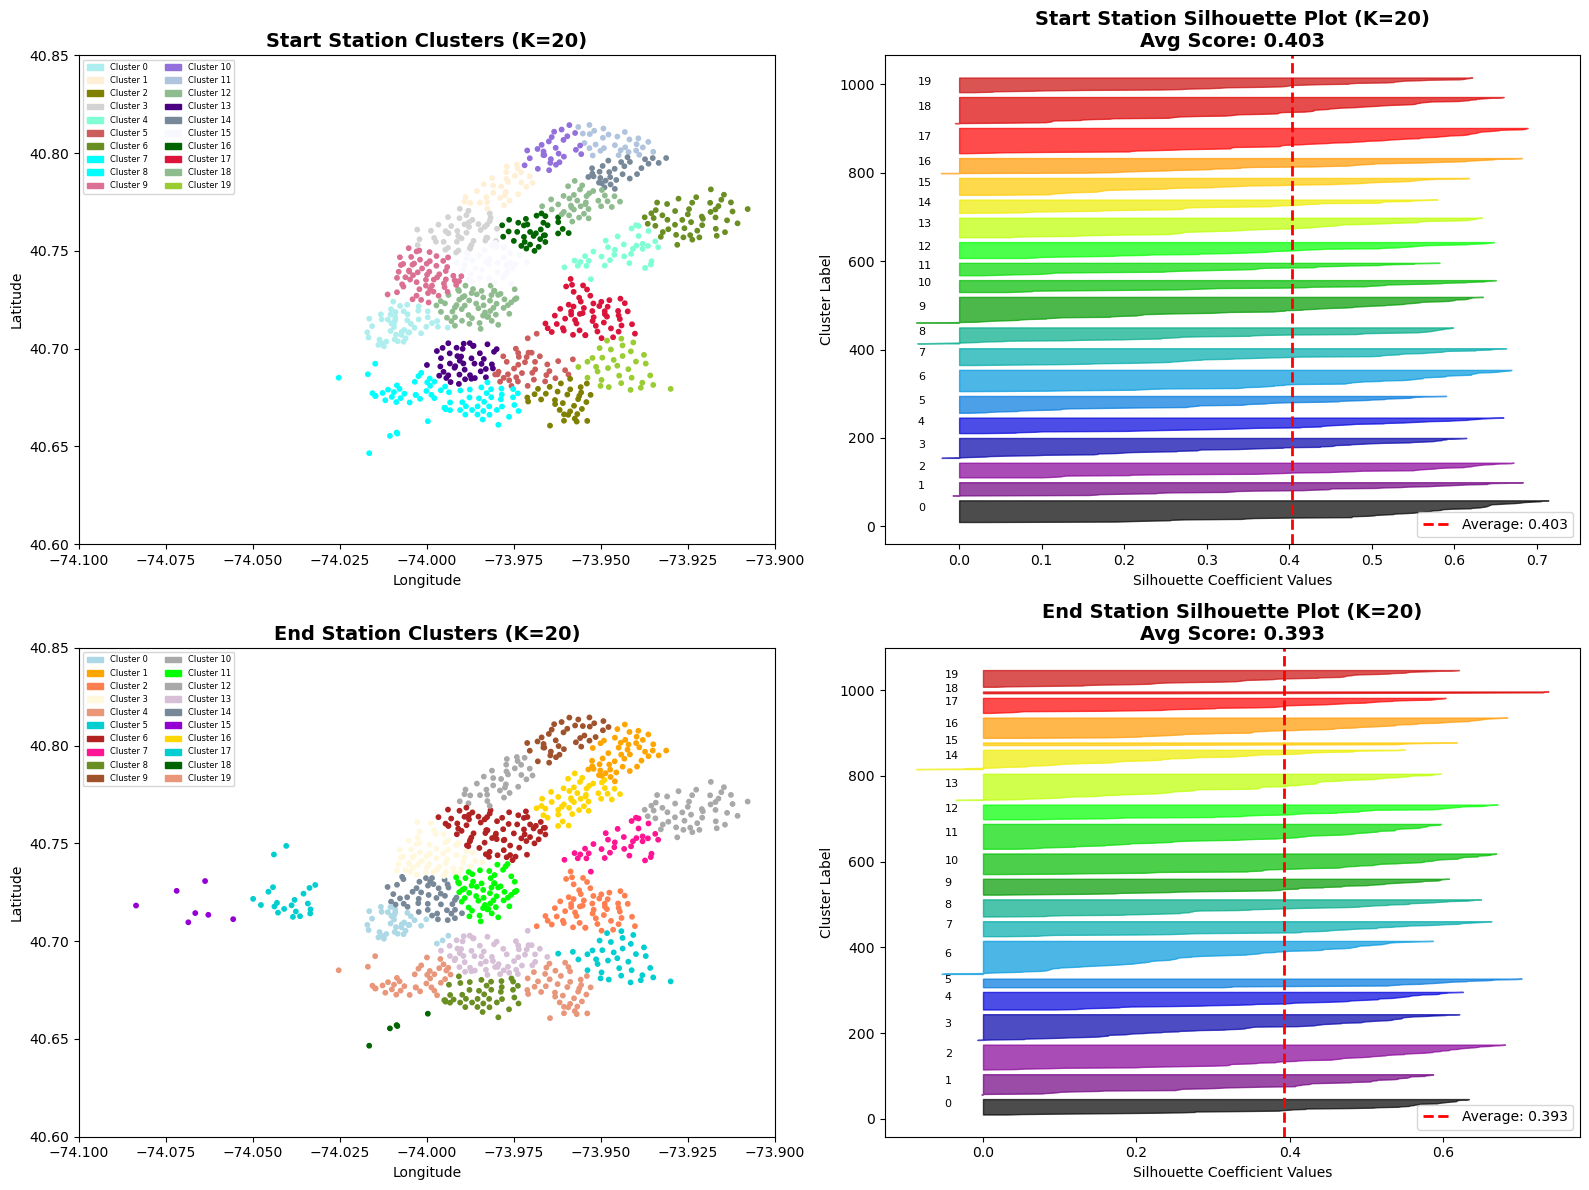

Start Station Average Silhouette Score: 0.403
End Station Average Silhouette Score: 0.393


In [89]:
from sklearn.cluster import KMeans
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
import random

K=20

# Fit K-means for start stations
k_start=KMeans(K)
k_start.fit(start_station_df)
dt_clusters_start=start_station_df.copy()
dt_clusters_start['cluster']=k_start.fit_predict(start_station_df)

# Fit K-means for end stations
k_end=KMeans(K)
k_end.fit(end_station_df)
dt_clusters_end=end_station_df.copy()
dt_clusters_end['cluster']=k_end.fit_predict(end_station_df)

# Generate colors
num_colors=K
colors=list(mcolors.CSS4_COLORS.keys())
cluster_colors_start = random.choices(colors,k=K)
cluster_colors_end = random.choices(colors,k=K)

# Prepare data for start stations
x_points_start=dt_clusters_start["longitude"]
y_points_start=dt_clusters_start["latitude"]
labels_start = dt_clusters_start["cluster"]
x_start=[]
y_start=[]
c_start=[]
for label, x, y in zip(labels_start, x_points_start, y_points_start):
    if label == -1:
        continue
    x_start.append(x)
    y_start.append(y)
    c_start.append(cluster_colors_start[label])

# Prepare data for end stations
x_points_end=dt_clusters_end["longitude"]
y_points_end=dt_clusters_end["latitude"]
labels_end = dt_clusters_end["cluster"]
x_end=[]
y_end=[]
c_end=[]
for label, x, y in zip(labels_end, x_points_end, y_points_end):
    if label==-1:
        continue
    x_end.append(x)
    y_end.append(y)
    c_end.append(cluster_colors_end[label])

# Calculate silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg_start = silhouette_score(start_station_df, k_start.labels_)
sample_silhouette_values_start = silhouette_samples(start_station_df, k_start.labels_)

silhouette_avg_end = silhouette_score(end_station_df, k_end.labels_)
sample_silhouette_values_end = silhouette_samples(end_station_df, k_end.labels_)

# Create combined plot with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Start Station Clusters
ax1 = axes[0, 0]
ax1.scatter(x_start, y_start, s=10, c=c_start)
ax1.set_xlim(-74.1, -73.9)
ax1.set_ylim(40.6, 40.85)
ax1.set_title(f'Start Station Clusters (K={K})', fontsize=14, fontweight='bold')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
legend_patches_start = [Patch(color=cluster_colors_start[i], label=f"Cluster {i}") for i in range(K)]
ax1.legend(handles=legend_patches_start, loc='upper left', fontsize=6, ncol=2)

# Plot 2: Start Station Silhouette Plot
ax2 = axes[0, 1]
y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values_start[k_start.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / K)
    ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=8)
    y_lower = y_upper + 10
ax2.set_title(f"Start Station Silhouette Plot (K={K})\nAvg Score: {silhouette_avg_start:.3f}", 
              fontsize=14, fontweight='bold')
ax2.set_xlabel("Silhouette Coefficient Values")
ax2.set_ylabel("Cluster Label")
ax2.axvline(x=silhouette_avg_start, color="red", linestyle="--", linewidth=2, 
            label=f"Average: {silhouette_avg_start:.3f}")
ax2.legend()

# Plot 3: End Station Clusters
ax3 = axes[1, 0]
ax3.scatter(x_end, y_end, s=10, c=c_end)
ax3.set_xlim(-74.1, -73.9)
ax3.set_ylim(40.6, 40.85)
ax3.set_title(f'End Station Clusters (K={K})', fontsize=14, fontweight='bold')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
legend_patches_end = [Patch(color=cluster_colors_end[i], label=f"Cluster {i}") for i in range(K)]
ax3.legend(handles=legend_patches_end, loc='upper left', fontsize=6, ncol=2)

# Plot 4: End Station Silhouette Plot
ax4 = axes[1, 1]
y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values_end[k_end.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / K)
    ax4.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax4.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=8)
    y_lower = y_upper + 10
ax4.set_title(f"End Station Silhouette Plot (K={K})\nAvg Score: {silhouette_avg_end:.3f}", 
              fontsize=14, fontweight='bold')
ax4.set_xlabel("Silhouette Coefficient Values")
ax4.set_ylabel("Cluster Label")
ax4.axvline(x=silhouette_avg_end, color="red", linestyle="--", linewidth=2, 
            label=f"Average: {silhouette_avg_end:.3f}")
ax4.legend()

plt.tight_layout()
plt.show()

print(f"Start Station Average Silhouette Score: {silhouette_avg_start:.3f}")
print(f"End Station Average Silhouette Score: {silhouette_avg_end:.3f}")

In [90]:
# Merge cluster assignments to the original dataframe
f_cluster_merge = f.merge(dt_clusters_end['cluster'], left_on='end_station_id', right_index=True, how='left')

f_cluster_merge.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
Trip ID,,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,0,False,6
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,0,False,3
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,0,False,3
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,0,False,6
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,0,False,12
